# Emotion Recognition Using CNN 
## Description
This project implements an emotion recognition system using a Convolutional Neural Network (CNN). 
It aims to classify images into different emotion categories such as happiness, sadness, anger, etc., by leveraging 
deep learning techniques. This system can be applied in areas such as sentiment analysis, human-computer interaction, 
and mental health monitoring.

## Dataset
The dataset used for this project is from kaggle and consists of 35,887 labeled grayscale images representing different emotions. Each image is described by a series of pixel values (in string format) and is categorized into one of several predefined emotion classes. The dataset contains three columns: emotion, which is an integer label representing the emotion category (0: Angry, 1: Disgust, 2: Fear, 3: Happy, 4: Sad, 5: Surprise, 6: Neutral); pixels, a space-separated string of pixel intensity values (ranging from 0 to 255) for a 48x48 grayscale image; and Usage, which indicates the dataset split as either Training (used to train the model), Validation (used for hyperparameter tuning), or Testing (used for final evaluation).

## Methodology
### Data Preprocessing:
Image normalization and resizing.
Data augmentation using techniques like rotation, zooming, and flipping.
Splitting the dataset into training, validation, and test sets.

### Model Architecture:
A custom Convolutional Neural Network (CNN) was designed with the following layers:
Convolutional layers for feature extraction.
Max-pooling layers for dimensionality reduction.
Fully connected layers for classification.
Dropout layers to reduce overfitting.
Optimizers used: Mainly Adam

### Training:
The model is trained with a categorical cross-entropy loss function.
Early stopping and learning rate schedulers are used for optimization.

### Evaluation:
Metrics such as accuracy, precision, recall, and F1-score are calculated.
A confusion matrix is generated to visualize performance across emotion classes.

## Results
Accuracy: Achieved an accuracy of around 60%.
Confusion Matrix: Include a visual representation.
Sample Predictions:
Provide some visual examples of the model’s predictions alongside true labels.

## Future Work
Improve model accuracy by experimenting with advanced architectures.
Deploy the model as a web application using Flask or Streamlit.
Extend the dataset for better generalization.

In [87]:
!pip install scikit-plot


In [88]:
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.preprocessing.image import load_img
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [89]:
data = pd.read_csv("D:\\python_lab_20004\\test\\fer2013.csv")
data.shape

(35887, 3)

In [90]:
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [91]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [92]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
fig = px.bar(x = CLASS_LABELS,
             y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] , 
             color = np.unique(data['emotion']) ,
             color_continuous_scale="Magma") 
fig.update_xaxes(title="Emotions")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [93]:
data = data.sample(frac=1)

In [94]:
labels = to_categorical(data[['emotion']], num_classes=7)

In [95]:
train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)

In [96]:
pixels = train_pixels.reshape((35887*2304,1))

In [97]:
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)

In [98]:
pixels = train_pixels.reshape((35887, 48, 48,1))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)


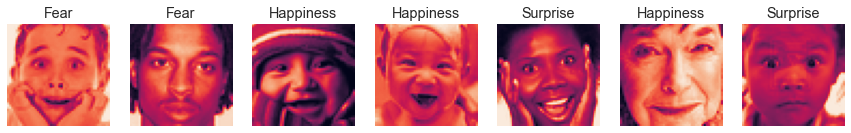

In [101]:
plt.figure(figsize=(15,23))
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
i = 1
for i in range (7):
    img = np.squeeze(X_train[i])
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    index = np.argmax(y_train[i])
    plt.title(label_dict[index])
    plt.axis('off')
    i += 1
plt.show()

In [102]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(  width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2)
valgen = ImageDataGenerator(   width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               zoom_range = 0.2) 

In [103]:
datagen.fit(X_train)
valgen.fit(X_val)

In [104]:
train_generator = datagen.flow(X_train, y_train, batch_size=64)
val_generator = datagen.flow(X_val, y_val, batch_size=64)

In [105]:
def cnn_model():

  model= tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
      
  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten()) 
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
      
  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(7, activation='softmax'))
  model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
  return model

In [106]:
model = cnn_model()

In [107]:
model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_21 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 24, 24, 128)      

In [109]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 5),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

In [110]:
history = model.fit(train_generator,
                    epochs=80,
                    batch_size=64,   
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/80
455/455 [==============================] - ETA: 0s - loss: 6.6552 - accuracy: 0.2169 
Epoch 1: val_accuracy improved from -inf to 0.23529, saving model to best_model.h5
455/455 [==============================] - 15820s 35s/step - loss: 6.6552 - accuracy: 0.2169 - val_loss: 2.5296 - val_accuracy: 0.2353
Epoch 2/80
455/455 [==============================] - ETA: 0s - loss: 2.4970 - accuracy: 0.2841
Epoch 2: val_accuracy improved from 0.23529 to 0.24613, saving model to best_model.h5
455/455 [==============================] - 2007s 4s/step - loss: 2.4970 - accuracy: 0.2841 - val_loss: 4.0338 - val_accuracy: 0.2461
Epoch 3/80
455/455 [==============================] - ETA: 0s - loss: 2.6553 - accuracy: 0.3808
Epoch 3: val_accuracy improved from 0.24613 to 0.42353, saving model to best_model.h5
455/455 [==============================] - 1043s 2s/step - loss: 2.6553 - accuracy: 0.3808 - val_loss: 2.6849 - val_accuracy: 0.4235
Epoch 4/80
455/455 [==============================] - E

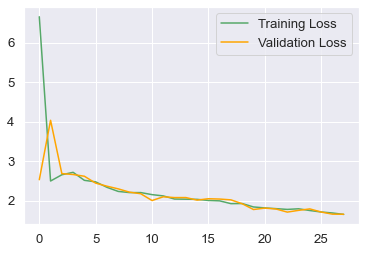

In [126]:
plt.plot(history.history["loss"],'g', label="Training Loss")
plt.plot(history.history["val_loss"],'orange', label="Validation Loss")
plt.legend()

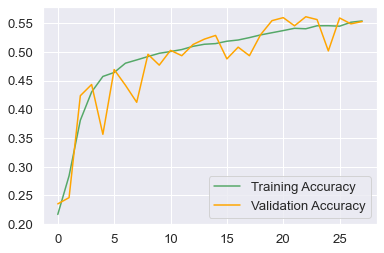

In [123]:
plt.plot(history.history["accuracy"],'g',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'orange',label="Validation Accuracy")
plt.legend()

In [113]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 21s 180ms/step - loss: 1.6610 - accuracy: 0.5793
Test Acc: 0.5792700052261353


In [114]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 23s 193ms/step


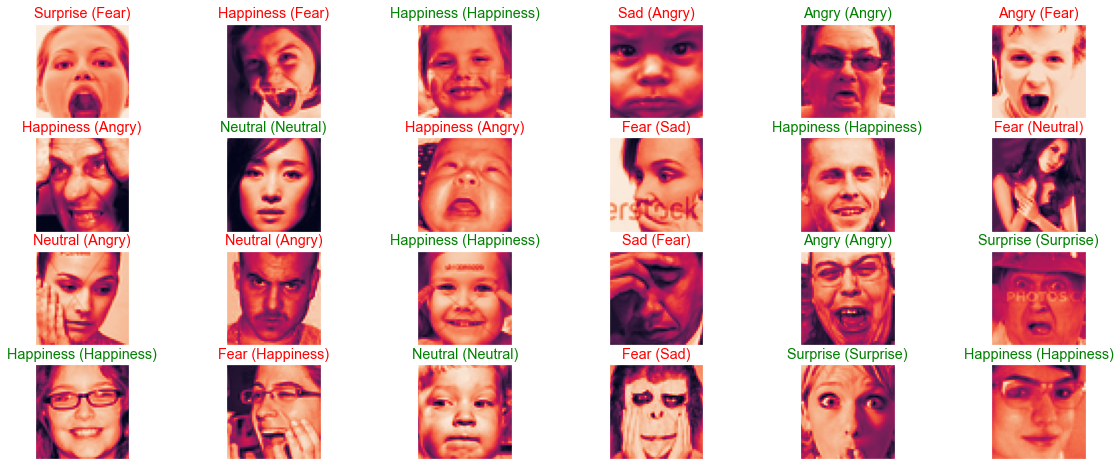

In [115]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

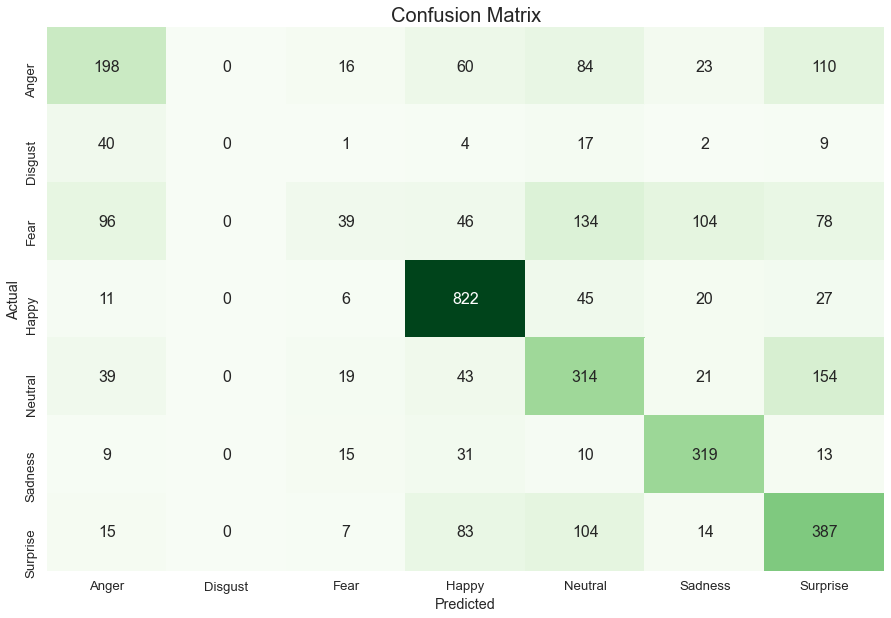

In [125]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Greens", annot=True, annot_kws={"size": 16}, fmt='g')

In [117]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.485     0.403     0.440       491
           1      0.000     0.000     0.000        73
           2      0.379     0.078     0.130       497
           3      0.755     0.883     0.814       931
           4      0.444     0.532     0.484       590
           5      0.634     0.804     0.709       397
           6      0.497     0.634     0.558       610

    accuracy                          0.579      3589
   macro avg      0.456     0.476     0.448      3589
weighted avg      0.542     0.579     0.542      3589

